In [175]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)
# Combine the data into a single dataset

df = pd.merge(mouse_df, clinical_df , how = 'right', on = 'Mouse ID')

# Display the data table for preview
df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [177]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# Convert to DataFrame
df1 = df.groupby(['Drug', 'Timepoint']).mean().drop(['Metastatic Sites'], axis = 1)



# Preview DataFrame
df1.head(10)

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
          25                  39.939528
          30                  38.769339
          35                  37.816839
          40                  36.958001
          45                  36.236114

In [184]:
drugs = df["Drug"].unique() #Series of all unique drugs in the complete dataframe
timepoint = df["Timepoint"].unique() #Series of all unique timepoints in the complete dataframe
std_error_mean = dict() #Creates an empty dictionary that will hold the standard error of the mean by drug and timepoint

#Loop with that determines the standard error of the mean for each drug and timepoint and stores it on the previously created dictionary
for drug in drugs:
    for time in timepoint:
        temp_df = df.loc[(df["Drug"] == drug) & (df['Timepoint'] == time)]
        error = sem(temp_df.iloc[:, 3])
        std_error_mean[(drug,time)] = error

In [181]:
updated_std_error_mean = dict() #new empty dictionary, will hold the error in the order according to the groupby dataframe df1

#for loop that will populate the previously created dictionary according to the order in df1
for i in range(0, len(df1)):
    for j in range(0, len(std_error_mean)):
        if (df1.index.values[i] == list(std_error_mean.keys())[j]):
            updated_std_error_mean[list(std_error_mean.keys())[j]] = list(std_error_mean.values())[j]

In [188]:
# Stores the Standard Error of Tumor Volumes Grouped by Drug and Timepoint in the same order as per df1
std_error = list(updated_std_error_mean.values())

In [190]:
#Appends the Std error of the mean to df1
df1['Standard Error'] = std_error

# Preview DataFrame
df1.head(3)

Tumor Volume (mm3)  Standard Error
Drug      Timepoint                                    
Capomulin 0                   45.000000        0.000000
          5                   44.266086        0.448593
          10                  43.084291        0.702684

In [191]:
# Minor Data Munging to Re-Format the Data Frames
df4 = df1.drop(['Standard Error'], axis = 1)
df5 = df4.swaplevel().unstack()

# Preview that Reformatting worked
df5


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   
25                 39.939528  54.287674  55.715252  57.678982  56.731968   
30                 38.769339  56.769517  58.299397  60.994507  59.559509   
35                 37.816839  58.827548  60.742461  63.371686  62.685087   
40                 36.958001  61.467895  63.162824  66.068580  65.600754   
45                 36.236114  64.132421  65.755562  70.662958  69.265506   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334  
25         57.482574  55.504138  38.974300  56.166123  55.432935  
30         59.809063  58.196374  38.703137  59.826738  57.713531  
35         62.420615  60.350199  37.451996  62.440699  60.089372  
40         65.052675  63.045537  36.574081  65.356386  62.916692  
45         68.084082  66.258529  34.955595  68.438310  65.960888

In [192]:
#Rework the error to use it in the bar plot that follows

drugs_df5 = list(df5.columns)
error_dict = dict()

for i in range(0,10):
    temp_list = []
    for j in range(i*10,(i+1)*10):
         temp_list.append(std_error[j])
    error_dict[drugs_df5[i][1]] = temp_list

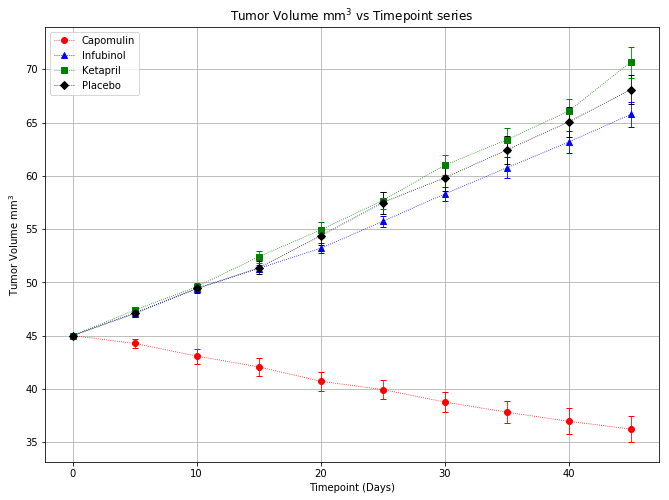

In [60]:
# Generate the Plot (with Error Bars)
studied_drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x_axis = time_point
color = ['red', 'blue', 'green', 'black']
cnt = 0

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(11)

for drug in studied_drugs:
    for i in range(0,len(error_dict)):
        if (list(error_dict.keys())[i] == drug):
            plt.errorbar(x_axis, df5['Tumor Volume (mm3)'][drug], yerr = error_dict[drug], fmt = 'none', ecolor=color[cnt], capsize = 3, elinewidth=.8)
            cnt = cnt + 1


plt.xlabel('Timepoint (Days)')
plt.ylabel(r'Tumor Volume mm$^{3}$')
plt.title(r'Tumor Volume mm$^{3}$ vs Timepoint series')



plt.plot(x_axis, df5['Tumor Volume (mm3)']['Capomulin'], 'r:o', linewidth = 0.8)
plt.plot(x_axis, df5['Tumor Volume (mm3)']['Infubinol'], 'b:^', linewidth = 0.8)
plt.plot(x_axis, df5['Tumor Volume (mm3)']['Ketapril'], 'g:s', linewidth = 0.8)
plt.plot(x_axis, df5['Tumor Volume (mm3)']['Placebo'], 'k:D', linewidth = 0.8)
plt.legend(labels = studied_drugs)

plt.grid()


# Save the Figure
plt.savefig('tumorvolume.png')

# Show the Figure

## Metastatic Response to Treatment

In [193]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
# Convert to DataFrame
df6 = df.groupby(['Drug', 'Timepoint']).mean().drop(['Tumor Volume (mm3)'], axis = 1)
# Preview DataFrame
df6.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [198]:
drugs = df["Drug"].unique() #Series of all unique drugs in the complete dataframe
time_point = df["Timepoint"].unique() #Series of all unique timepoints in the complete dataframe
met_mean_std_error = dict() #Creates an empty dictionary that will hold the standard error of the mean by drug and timepoint

#Loop with that determines the standard error of the mean for each drug and timepoint and stores it on the previously created dictionary
for drug in drugs:
    for time in time_point:
        temp_df = df.loc[(df["Drug"] == drug) & (df['Timepoint'] == time)]
        error = sem(temp_df.iloc[:, 4])
        met_mean_std_error[(drug,time)] = error

In [197]:
met_updated_mean_std_error = dict() #new empty dictionary, will hold the error in the order according to the groupby dataframe df6

#for loop that will populate the previously created dictionary according to the order in df6
for i in range(0, len(df6)):
    for j in range(0, len(met_mean_std_error)):
        if (df6.index.values[i] == list(met_mean_std_error.keys())[j]):
            met_updated_mean_std_error[list(met_mean_std_error.keys())[j]] = list(met_mean_std_error.values())[j]

In [64]:
# Stores the Standard Error of Tumor Volumes Grouped by Drug and Timepoint in the same order as per df6
met_std_error = []
for i in range(0,len(met_updated_mean_std_error)):
    met_std_error.append(list(met_updated_mean_std_error.values())[i][1])

In [200]:
#Appends the Std error of the mean to df1
df6['Standard Error'] = std_error

#Preview the dataframe
df6.head(3)

Metastatic Sites  Standard Error
Drug      Timepoint                                  
Capomulin 0                      0.00        0.000000
          5                      0.16        0.448593
          10                     0.32        0.702684

In [201]:
# Minor Data Munging to Re-Format the Data Frames
df7 = df6.drop(['Standard Error'], axis = 1)
df8 = df7.swaplevel().unstack()

# Preview that Reformatting worked
df8

Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   
25                0.818182  1.500000  1.277778  1.631579  1.500000  1.941176   
30                1.090909  1.937500  1.588235  2.055556  2.066667  2.266667   
35                1.181818  2.071429  1.666667  2.294118  2.266667  2.642857   
40                1.380952  2.357143  2.100000  2.733333  2.466667  3.166667   
45                1.476190  2.692308  2.111111  3.363636  2.538462  3.272727   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118  
25         1.357143  0.652174  1.157895  1.687500  
30         1.615385  0.782609  1.388889  1.933333  
35         2.300000  0.952381  1.562500  2.285714  
40         2.777778  1.100000  1.583333  2.785714  
45         2.571429  1.250000  1.727273  3.071429

In [69]:
#Rework the error to use it in the bar plot that follows
drugs_df5 = list(df5.columns)
met_error_dict = dict()

for i in range(0,10):
    temp_list = []
    for j in range(i*10,(i+1)*10):
         temp_list.append(met_std_error[j])
    met_error_dict[drugs_df5[i][1]] = temp_list

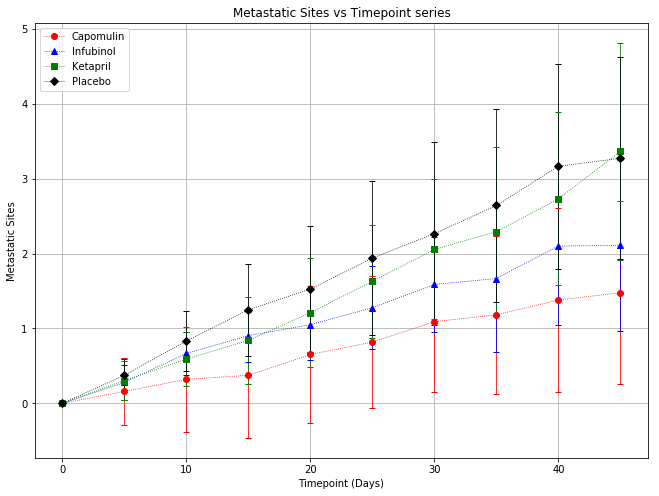

In [203]:
# Generate the Plot (with Error Bars)
studied_drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x_axis = time_point
color = ['red', 'blue', 'green', 'black']
cnt = 0

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(11)

for drug in studied_drugs:
    for i in range(0,len(met_error_dict)):
        if (list(met_error_dict.keys())[i] == drug):
            plt.errorbar(x_axis, df8['Metastatic Sites'][drug], yerr = error_dict[drug], fmt = 'none', ecolor=color[cnt], capsize = 3, elinewidth=.8)
            cnt = cnt + 1

plt.xlabel('Timepoint (Days)')
plt.ylabel(r'Metastatic Sites')
plt.title(r'Metastatic Sites vs Timepoint series')


plt.plot(x_axis, df8['Metastatic Sites']['Capomulin'],'r:o', linewidth = 0.8)
plt.plot(x_axis, df8['Metastatic Sites']['Infubinol'], 'b:^', linewidth = 0.8)
plt.plot(x_axis, df8['Metastatic Sites']['Ketapril'], 'g:s', linewidth = 0.8)
plt.plot(x_axis, df8['Metastatic Sites']['Placebo'], 'k:D', linewidth = 0.8)
plt.legend(labels = studied_drugs)
plt.grid()

# Save the Figure
plt.savefig('metastaticsites.png')

# Show the Figure

## Survival Rates

In [204]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
df9 = df.groupby(['Drug', 'Timepoint']).count().drop(['Metastatic Sites', 'Tumor Volume (mm3)'], axis = 1)


# Preview DataFrame
df9.head()

Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [205]:
# Minor Data Munging to Re-Format the Data Frames
df10 = df9['Mouse ID'].swaplevel().unstack()


# Preview the Data Frame
df10.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


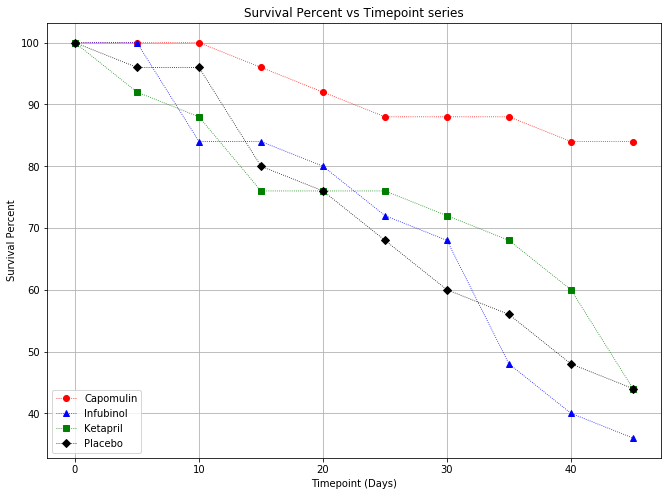

In [206]:
# Generate the Plot (Accounting for percentages)
studied_drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
x_axis = time_point

fig = plt.figure()
fig.set_figheight(8)
fig.set_figwidth(11)

plt.xlabel('Timepoint (Days)')
plt.ylabel(r'Survival Percent')
plt.title(r'Survival Percent vs Timepoint series')


plt.plot(x_axis, df10['Capomulin']*4,'r:o', linewidth = 0.8)
plt.plot(x_axis, df10['Infubinol']*4, 'b:^', linewidth = 0.8)
plt.plot(x_axis, df10['Ketapril']*4, 'g:s', linewidth = 0.8)
plt.plot(x_axis, df10['Placebo']*4, 'k:D', linewidth = 0.8)
plt.grid()
plt.legend(labels = studied_drugs, loc = 3)


# Save the Figure
plt.savefig('survival.png')

# Show the Figure

## Summary Bar Graph

In [208]:
# Calculate the percent changes for each drug

timepoint = list(df5.index)
drugs = list(df5.columns)

for item in drugs:
    temp = drugs.pop(0)
    drugs.append(temp[1])
    
summary_dict = dict()
for drug in drugs: 
    init = list(df5['Tumor Volume (mm3)'][drug])[0]
    final = list(df5['Tumor Volume (mm3)'][drug])[-1]
    percent = (final-init)*100/init
    summary_dict[drug] = percent

# Display the data to confirm
summary_dict

{'Capomulin': -19.475302667894173,
 'Ceftamin': 42.51649185589744,
 'Infubinol': 46.12347172785188,
 'Ketapril': 57.028794686606076,
 'Naftisol': 53.92334713476923,
 'Placebo': 51.29796048315153,
 'Propriva': 47.24117486320637,
 'Ramicane': -22.320900462766673,
 'Stelasyn': 52.08513428789903,
 'Zoniferol': 46.57975086509525}

In [109]:
# Store all Relevant Percent Changes into a Tuple
my_tuple_drugs = tuple(list(summary_dict.keys()))
my_tuple_percent = tuple(list(summary_dict.values()))

drugs_series = pd.Series(my_tuple_drugs)
drugs_df = pd.DataFrame(drugs_series, columns = ['Drugs'])

percent_series = pd.Series(my_tuple_percent)
percent_df = pd.DataFrame(percent_series, columns = ['Percent Change'])
percent_df

summary_df = drugs_df
summary_df['Percent Change'] = percent_df['Percent Change']
summary_df

,Drugs,Percent Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


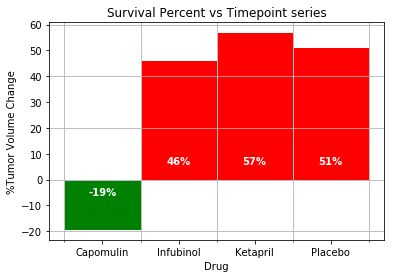

In [209]:
#Bar plot accounting for passing and failing drugs
fig, ax = plt.subplots()
ax.set_xticks([-0.5,0.5, 1.5, 2.5, 3.5], minor = True)
ax.set_yticks(range(-20,101,20), minor = True)

for drug in studied_drugs:
    temp_df = summary_df.loc[summary_df['Drugs'] == drug]
    temp_percent = float(temp_df['Percent Change'])
    if ( temp_percent < 0 ):
        color = 'green'
        sign = -1
    else: 
        color = 'red'
        sign = 1
    plt.bar(drug, temp_percent, color = color, width=1.0, edgecolor = 'white')
    plt.text(drug, sign*6, str(round(temp_percent)) + '%', horizontalalignment='center', color='white', weight = 'bold')

plt.xlabel('Drug')
plt.ylabel(r'%Tumor Volume Change')
plt.title(r'Survival Percent vs Timepoint series')
plt.grid(which = 'minor', axis = 'both')
plt.savefig('summary.png')
